<a href="https://colab.research.google.com/github/PabloBlasHdez/Data-Science/blob/main/MNIST_CIFAR10_Model_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pablo Blas Hernández - 100474502**

In [ ]:
import pandas as pd
import numpy as np
from keras import utils
from sklearn.tree import export_graphviz
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.datasets import cifar10

# **MNIST DATASET**

11490434/11490434 [==============================] - 2s 0us/step
Número de imágenes de entrenamiento en MNIST: 60000
Número de imágenes de prueba en MNIST: 10000


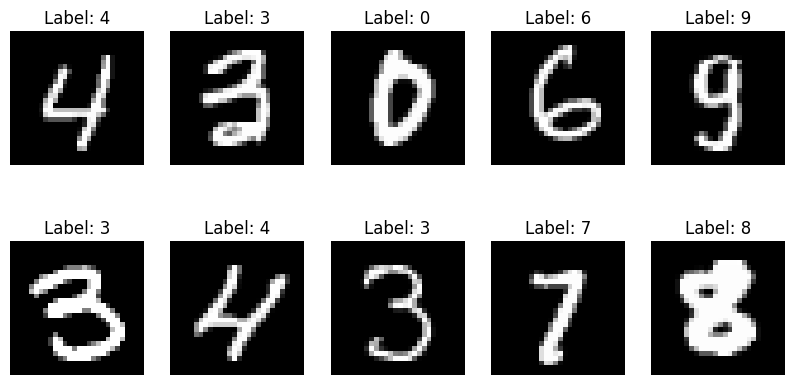

In [ ]:
# Cargar y preprocesar datos
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Obtener el número de imágenes de entrenamiento y prueba
num_train_images = train_images.shape[0]
num_test_images = test_images.shape[0]

print("Número de imágenes de entrenamiento en MNIST:", num_train_images)
print("Número de imágenes de prueba en MNIST:", num_test_images)

# Mostrar 10 imágenes aleatorias
plt.figure(figsize=(10, 5))
for i in range(10):
    index = np.random.randint(0, train_images.shape[0])
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[index], cmap='gray')
    plt.title(f'Label: {train_labels[index]}')
    plt.axis('off')
plt.show()

La selección de los mejores parámetros para cada modelo se basan en búsqueda de información en distintas fuentes. Una fuente notable de ayuda ha sido la tabla de la página 184 del libro comentado en clase: "Approaching (Almost) Any Machine Learning Problem". Los hiperparámetros han sido ajustados a mano, probando distintas combinaciones de valores e investigando en fuentes como la anterior mencionada, hasta encontrar la combinación que mejor resulatdos daba a cada modelo, tal y como se dijo en clase, sin utilización de GridSearch o RandomSearch u OpenDA.

# **DECISION TREE**

**max_depth:** Este hiperparámetro controla la profundidad máxima del árbol de decisión. Una profundidad mayor puede llevar a un modelo más complejo que se ajusta mejor a los datos de entrenamiento, pero también puede aumentar el riesgo de overfitting. Se eligió un valor de 15 para limitar la profundidad del árbol y evitar el overfitting, ya que se espera que este valor permita que el árbol capture patrones complejos en los datos sin ser demasiado complejo.

**min_samples_split:** Este hiperparámetro establece el número mínimo de muestras requeridas para dividir un nodo interno. Un valor más alto de min_samples_split puede ayudar a evitar divisiones que generen ramas con pocos datos, lo que reduce el riesgo de overfitting. Se eligió un valor de 5 para asegurar que haya suficientes muestras en cada división para hacer predicciones significativas, pero no tan alto como para restringir en exceso el crecimiento del árbol.

**min_samples_leaf:** Este hiperparámetro establece el número mínimo de muestras requeridas para formar una hoja del árbol. Un valor más alto de min_samples_leaf puede ayudar a prevenir el overfitting al limitar el número mínimo de muestras en una hoja, lo que evita divisiones demasiado específicas. Se eligió un valor de 1 para permitir que el árbol capture incluso las relaciones más específicas entre las características y las etiquetas.

**random_state**: garantiza la reproducibilidad de los resultados al fijar la semilla para la generación de números aleatorios. Esto permite que los mismos datos aleatorios y las mismas divisiones se utilicen en cada ejecución, asegurando resultados consistentes.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Cargar datos de entrenamiento y prueba de MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocesamiento de los datos
x_train = x_train.reshape(-1, 28*28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28*28).astype('float32') / 255.0

# Definir el clasificador Decision Tree con los hiperparámetros seleccionados manualmente
dt_classifier = DecisionTreeClassifier(max_depth=15, min_samples_split=5, min_samples_leaf=1, random_state=42)

# Entrenamiento del modelo
dt_classifier.fit(x_train, y_train)

# Predicción
y_pred = dt_classifier.predict(x_test)

# Calcular la precisión
accuracy_dt = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_dt)

Accuracy: 0.8823


# **RANDOM FOREST**

**n_estimators**: Este hiperparámetro indica el número de árboles que se construirán. Un mayor número de árboles generalmente mejora la precisión del modelo, pero también aumenta el costo computacional. Se eligen valores más altos para capturar una variedad más amplia de relaciones en los datos y reducir la variabilidad inherente a la construcción de árboles individuales. En este caso, se podría elegir un valor más alto, como 100 o 200, pero para mantener un tiempo de entrenamiento razonable, se podría seleccionar un valor intermedio, como 120.

**max_depth**: Este hiperparámetro controla la profundidad máxima de cada árbol. Limitar la profundidad de los árboles puede ayudar a prevenir el overfitting y mejorar la capacidad de generalización del modelo. Se elige un valor moderadamente alto, como 25, para permitir que los árboles capturen relaciones complejas en los datos sin ser demasiado complejos.

**min_samples_split**: Este hiperparámetro establece el número mínimo de muestras requeridas para dividir un nodo interno. Un valor más alto puede ayudar a prevenir divisiones que generen ramas con pocos datos y, por lo tanto, reducir el overfitting. Se elige un valor intermedio, como 5, para asegurar que haya suficientes muestras en cada división para hacer predicciones significativas.

**min_samples_leaf**: Este hiperparámetro establece el número mínimo de muestras requeridas para formar una hoja del árbol. Al igual que min_samples_split, un valor más alto puede ayudar a prevenir el overfitting al limitar el número mínimo de muestras en una hoja. Se elige un valor bajo, como 1, para permitir que el árbol capture incluso relaciones específicas entre características y etiquetas.

**max_features**: Este hiperparámetro controla el número de características a considerar al buscar la mejor división en cada nodo. Se puede especificar como un valor numérico, un porcentaje o una cadena ('sqrt', 'log2', None). 'sqrt' elige el número de características igual a la raíz cuadrada del total de características. Se elige 'sqrt' para mantener el modelo más generalizado.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Cargar datos de entrenamiento y prueba de MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocesamiento de los datos
x_train = x_train.reshape(-1, 28*28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28*28).astype('float32') / 255.0

# Definir el clasificador Random Forest con los hiperparámetros seleccionados
rf_classifier = RandomForestClassifier(n_estimators=120, max_depth=25, min_samples_split=5, min_samples_leaf=1, max_features='sqrt', random_state=42)

# Entrenamiento del modelo
rf_classifier.fit(x_train, y_train)

# Predicción
y_pred = rf_classifier.predict(x_test)

# Calcular la precisión
accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf)

Accuracy: 0.9687


# **XGBOOST**

**n_estimators**: El número de árboles (estimadores) determina cuántas iteraciones realizará el algoritmo para construir el modelo. Un mayor número de árboles puede aumentar la precisión del modelo, pero también incrementa el tiempo de entrenamiento y el riesgo de overfitting. El valor de 100 árboles es un punto de partida común que ofrece un buen balance entre un rendimiento adecuado y un tiempo de entrenamiento razonable.

**max_depth**: La profundidad máxima del árbol controla la complejidad del modelo, determinando cuántas divisiones o nodos puede tener cada árbol. Una mayor profundidad permite capturar patrones más complejos en los datos, pero también aumenta el riesgo de overfitting, donde el modelo se ajusta demasiado a los datos de entrenamiento y no generaliza bien a datos nuevos. El valor de 6 para la profundidad máxima es un compromiso común que permite al modelo aprender relaciones significativas sin ser excesivamente complejo, equilibrando adecuadamente sesgo y varianza.

**learning_rate**: La tasa de aprendizaje regula la contribución de cada árbol en la mejora del modelo. Una tasa de aprendizaje más alta permite una convergencia más rápida, reduciendo el tiempo de entrenamiento, pero también puede aumentar el riesgo de overfitting. El valor de 0.3 es relativamente alto y se elige para acelerar el proceso de entrenamiento inicial. Sin embargo, es importante tener en cuenta que una tasa de aprendizaje alta puede requerir un ajuste cuidadoso de otros parámetros y puede ser reducida si se observa que el modelo tiende al overfitting.

**subsample**: El parámetro de submuestreo (subsample) especifica la proporción de muestras que se utilizan para entrenar cada árbol. Usar menos del 100% de las muestras para cada árbol puede ayudar a reducir el overfitting y mejorar la capacidad de generalización del modelo. El valor de 0.8 indica que se utiliza el 80% de los datos para cada árbol con el fin de agregar robustez al modelo al mismo tiempo que se mantiene suficiente información para aprender de los datos.

**colsample_bytree**: El parámetro colsample_bytree define el porcentaje de características que se utilizan para entrenar cada árbol. Similar al subsample, utilizar solo una fracción de las características ayuda a evitar el overfitting y mejora la robustez del modelo. El valor de 0.8 significa que se usa el 80% de las características para cada árbol, promoviendo la diversidad entre los árboles y permitiendo al modelo capturar diferentes aspectos de los datos, lo que generalmente conduce a una mejor generalización.

**gamma**: El parámetro gamma establece la reducción mínima de pérdida necesaria para realizar una división adicional en un nodo del árbol. Un valor mayor de gamma hará que el modelo sea más conservador, evitando divisiones innecesarias y ayudando a reducir el overfitting. El valor de 0 significa que no hay una reducción mínima requerida, lo que permite una máxima flexibilidad en la construcción del árbol.

**reg_alpha**: El término de regularización L1 (reg_alpha) agrega una penalización al número absoluto de los pesos, fomentando que algunos de ellos sean exactamente cero y, por lo tanto, promoviendo la simplicidad del modelo. Un valor de 0 significa que no se aplica regularización L1. Este valor inicial permite al modelo tener la máxima flexibilidad en el ajuste de los pesos.

**reg_lambda**: El término de regularización L2 (reg_lambda) agrega una penalización cuadrática a los pesos, lo que ayuda a evitar que los pesos se vuelvan excesivamente grandes y, por lo tanto, reduce el riesgo de overfitting. Un valor de 1 proporciona una regularización moderada.

In [ ]:
import xgboost as xgb

# Cargar datos de entrenamiento y prueba de MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocesamiento de los datos
x_train = x_train.reshape(-1, 28*28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28*28).astype('float32') / 255.0

# Definir el clasificador XGBoost con los hiperparámetros seleccionados
xgb_classifier = xgb.XGBClassifier(
    n_estimators=100,  # Número de árboles a construir.
    max_depth=6,  # Profundidad máxima de cada árbol.
    learning_rate=0.3,  # Tasa de aprendizaje, controla la contribución de cada árbol.
    subsample=0.8,  # Porcentaje de muestras utilizadas para ajustar cada árbol.
    colsample_bytree=0.8,  # Porcentaje de características utilizadas para ajustar cada árbol.
    gamma=0,  # Mínima reducción de pérdida necesaria para realizar una división.
    reg_alpha=0,  # Término de regularización L1 en pesos de árbol.
    reg_lambda=1,  # Término de regularización L2 en pesos de árbol.
    random_state=42  # Semilla para reproducibilidad.
)

# Entrenamiento del modelo
xgb_classifier.fit(x_train, y_train)

# Predicción
y_pred = xgb_classifier.predict(x_test)

# Calcular la precisión
accuracy_xgb = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_xgb)

Accuracy: 0.9784


# **LIGHT GBM**

**objective**: especifica que el problema a resolver es de clasificación multiclase, adecuado para el conjunto de datos MNIST que contiene 10 categorías de dígitos. LightGBM ajusta el modelo para minimizar la pérdida de clasificación multiclase, asegurando que el modelo se entrene para distinguir entre múltiples clases simultáneamente. Este parámetro es esencial para problemas donde las etiquetas no son binarias sino múltiples.

**num_class**: indica el número de clases diferentes en el conjunto de datos. Para MNIST, hay 10 dígitos (0-9), por lo que se establece en 10. Esto informa al modelo de la estructura del problema y le permite asignar probabilidades a cada una de las 10 clases durante la predicción. Es fundamental configurar este parámetro correctamente para asegurar que el modelo gestione las salidas de forma adecuada para cada clase.

**boosting_type**: GBDT construye árboles de decisión secuencialmente, cada uno corrigiendo los errores de los anteriores.

**metric**: evalúa la tasa de error de clasificación multiclase, proporcionando una medida directa de cuántas predicciones son incorrectas.

**num_leaves**: especifica el número máximo de hojas en cada árbol de decisión. Más hojas pueden capturar más complejidades en los datos, pero también aumentan el riesgo de overfitting. El valor de 31 permite al modelo ser suficientemente flexible para capturar patrones complejos sin ser excesivamente detallado, lo que ayuda a evitar el overfitting.

**learning_rate**: Una tasa de apredizaje menor implica una menor contribución de cada arbol de decisión a la predicción final pero generaliza mejor a datos de test con los que el modelo no ha sido entrenado. El valor de 0.1 proporciona un buen equilibrio entre la velocidad de entrenamiento y la capacidad del modelo para generalizar bien a nuevos datos.

**feature_fraction**: especifica la fracción de características que se seleccionan aleatoriamente para entrenar cada árbol. Utilizar solo el 80% de las características en cada iteración ayuda a reducir el overfitting y promueve la diversidad de los árboles, mejorando la capacidad del modelo para generalizar.

**bagging_fraction**: indica la fracción de datos de entrenamiento utilizados para entrenar cada árbol. Al usar solo el 80% de los datos en cada iteración, se introduce aleatoriedad y se ayuda a evitar el overfitting, haciendo que el modelo sea más robusto.

**bagging_freq**: determina la frecuencia con la que se realiza el bagging (muestreo con reemplazo). Un valor de 5 significa que el bagging se realiza cada cinco iteraciones, lo que introduce diversidad adicional en el modelo. Esta estrategia ayuda a mejorar la generalización al reducir la correlación entre los árboles generados en iteraciones sucesivas.

**verbose**: controla el nivel de detalle de las salidas. Un valor de 0 significa que se suprimen las salidas detalladas durante el entrenamiento. Este ajuste es útil para mantener las salidas limpias.

**early_stopping_rounds**: se utiliza para detener el entrenamiento si la métrica de validación no mejora después de un número específico de rondas, en este caso, 10. Esta estrategia previene el overfitting al finalizar el entrenamiento temprano si el modelo deja de mejorar en el conjunto de validación, asegurando que el modelo no siga entrenándose innecesariamente y evitando el deterioro del rendimiento en datos nuevos.

In [ ]:
import lightgbm as lgb

# Cargar datos de entrenamiento y prueba de MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocesamiento de los datos
x_train = x_train.reshape(-1, 28*28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28*28).astype('float32') / 255.0

# Convertir a formato Dataset de LightGBM
train_data = lgb.Dataset(x_train, label=y_train)
test_data = lgb.Dataset(x_test, label=y_test, reference=train_data)

# Definir parámetros para LightGBM
params = {
    'objective': 'multiclass',  # Tipo de problema: clasificación multiclase
    'num_class': 10,  # Número de clases en el conjunto de datos MNIST
    'boosting_type': 'gbdt',  # Tipo de algoritmo de boosting: Gradient Boosting Decision Tree (GBDT)
    'metric': 'multi_error',  # Métrica de evaluación: error de clasificación multiclase
    'num_leaves': 31,  # Número máximo de hojas en un árbol
    'learning_rate': 0.1,  # Tasa de aprendizaje
    'feature_fraction': 0.8,  # Fracción de características a considerar en cada árbol
    'bagging_fraction': 0.8,  # Fracción de datos de entrenamiento a considerar en cada árbol
    'bagging_freq': 5,  # Frecuencia para realizar bagging, 0 significa desactivar
    'verbose': 0,  # Nivel de detalle de las salidas
    'random_state': 42,  # Semilla para reproducibilidad
    'early_stopping_rounds': 10,  # Detención temprana
}

# Entrenamiento del modelo con detención temprana
gbm = lgb.train(params, train_data, num_boost_round=100, valid_sets=[train_data, test_data])

# Predicción
y_pred = np.argmax(gbm.predict(x_test, num_iteration=gbm.best_iteration), axis=1)

# Calcular la precisión
accuracy_lgbm = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_lgbm)

Accuracy: 0.9766


# **Conclusiones modelos mnist**


Al comparar varios modelos de clasificación en el conjunto de datos MNIST, observamos diferencias significativas en su rendimiento, basadas en la precisión y las características de cada algoritmo.

El Decision Tree logró una precisión de 0.8823, que es la más baja entre los modelos evaluados. Este rendimiento se debe a que un solo árbol de decisión es propenso al overfitting, ya que intenta dividir los datos en segmentos muy específicos, capturando incluso el ruido del conjunto de entrenamiento. Esto conduce a una generalización deficiente cuando se enfrenta a datos no vistos.

El Random Forest, con una precisión de 0.9687, mejora considerablemente sobre el Decision Tree. Esto se debe a que Random Forest construye múltiples árboles de decisión y promedia sus predicciones. Al hacerlo, reduce el overfitting y mejora la capacidad de generalización. Sin embargo, aunque Random Forest es robusto y maneja bien la alta dimensionalidad, su precisión sigue siendo inferior a la de modelos más avanzados de boosting.

XGBoost alcanzó la mayor precisión, 0.9784. Este modelo se basa en el algoritmo de boosting de gradiente, que entrena secuencialmente modelos simples, corrigiendo los errores de los modelos anteriores. XGBoost es extremadamente eficiente y optimizado, utilizando regularización para evitar el sobreajuste y técnicas avanzadas de manejo de memoria y paralelización que mejoran su rendimiento. Además, su capacidad para manejar datos faltantes y sus métodos de poda de árboles contribuyen a su alta precisión y generalización.

El LightGBM, con una precisión de 0.9766, es muy competitivo y cercano a XGBoost. LightGBM está diseñado para ser altamente eficiente y escalable, utilizando una técnica basada en hojas en lugar de nivel para entrenar los árboles, lo que resulta en un tiempo de entrenamiento más rápido. Aunque su rendimiento es excelente, ligeramente menor que XGBoost, posiblemente debido a diferencias en la optimización de hiperparámetros y estructuras internas.

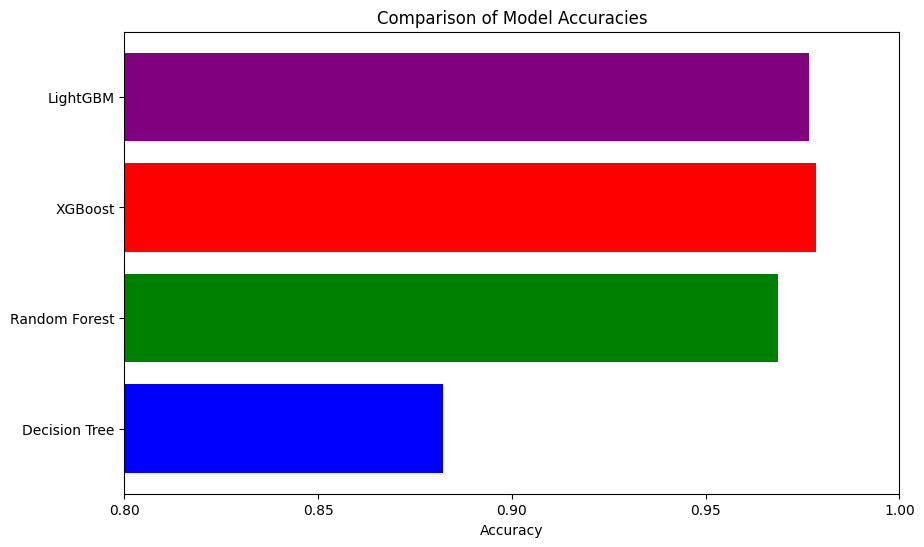

In [ ]:
# Crear un gráfico para comparar las precisiones
model_names = ['Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM']
accuracies = [accuracy_dt, accuracy_rf, accuracy_xgb, accuracy_lgbm]

plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Accuracy')
plt.title('Comparación de la precisión de los distintos modelos')
plt.xlim(0.8, 1)  # Establecer límite del eje x

# Generar ticks de 0.8 a 1 con incrementos de 0.05
plt.xticks(np.arange(0.8, 1.01, 0.05))

plt.show()

# **CIFAR-10 DATASET**

170498071/170498071 [==============================] - 6s 0us/step
Número de imágenes de entrenamiento en CIFAR10: 50000
Número de imágenes de prueba en CIFAR10: 10000


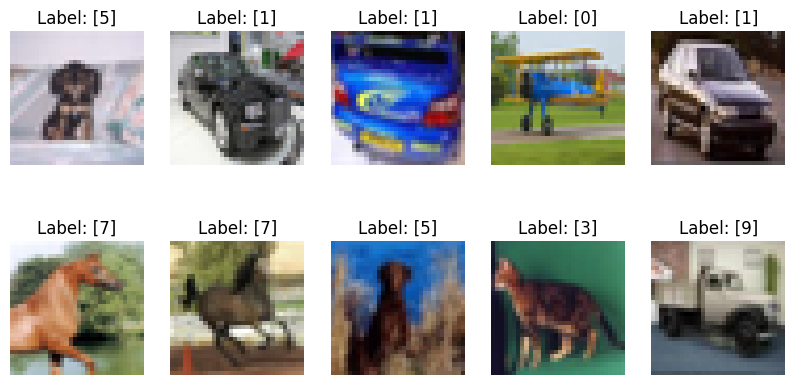

In [ ]:
# Cargar y preprocesar datos
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Obtener el número de imágenes de entrenamiento y prueba
num_train_images = train_images.shape[0]
num_test_images = test_images.shape[0]

print("Número de imágenes de entrenamiento en CIFAR10:", num_train_images)
print("Número de imágenes de prueba en CIFAR10:", num_test_images)

# Mostrar 10 imágenes aleatorias
plt.figure(figsize=(10, 5))
for i in range(10):
    index = np.random.randint(0, train_images.shape[0])
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[index], cmap='gray')
    plt.title(f'Label: {train_labels[index]}')
    plt.axis('off')
plt.show()

#**RED NEURONAL**

In [ ]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

In [ ]:
batch_size = 32
num_classes = 10
epochs = 20
data_augmentation = False

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170498071/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


 Fijamos el nombre de epocas a 20 (proceso más lento cuanto más epocas añadimos y más probabilidad de realizar overfitting). Las épocas se refieren al número de veces que se pasa todo el conjunto de datos hacia adelante y hacia atrás a través de la red neuronal durante el proceso de entrenamiento.

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices. This is called one hot encoding.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
#define the convnet
model = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FLATTERN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# a softmax classifier
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                        

En la primera etapa, nuestra red neuronal aprenderá 32 filtros convolucionales, cada uno de ellos con un tamaño de 3 x 3. La dimensión de salida será la misma que la del tamaño de entrada, por lo que será de 32 x 32, y la función de activación será ReLU, que es una forma sencilla de introducir no linealidad (reemplaza todos los valores negativos en la salida del filtro con cero, lo que ayuda a la red a aprender características más complejas.). Después, tendremos otros 32 filtros convolucionales, cada uno de ellos también con un tamaño de 3 x 3 y activación ReLU. Luego de eso, tenemos una operación de max-pooling (reducir el tamaño espacial (ancho y alto) de las representaciones de las imágenes) con un tamaño de 2 x 2 y una reducción del 25% de las unidades con dropout (previene overfitting y hace que la red sea más robusta y menos dependiente de unidades individuales, ya que no puede confiar en la presencia de ninguna unidad específica durante el entrenamiento.).

En la siguiente etapa en la secuencia profunda, nuestra red aprenderá 64 filtros convolucionales, cada uno de ellos con un tamaño de 3 x 3. La dimensión de salida será la misma que la del tamaño de entrada y la activación será ReLU, seguido de otros 64 filtros convolucionales, cada uno de ellos con un tamaño de 3 x 3 y activación ReLU. Después de eso, tendremos otra operación de max-pooling con un tamaño de 2 x 2 y una reducción del 25% de las unidades con dropout.

Y la etapa final en la secuencia profunda es una red densa con 512 unidades y activación ReLU, seguida de una reducción del 50% de las unidades con dropout y por una capa softmax con 10 clases como salida (transforma las salidas de una red neuronal en una distribución de probabilidades sobre un conjunto de clases diferentes.)

In [ ]:
opt = keras.optimizers.RMSprop(learning_rate=0.0001)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

Epoch 1/20
1563/1563 [==============================] - 16s 7ms/step - loss: 1.8280 - accuracy: 0.3262 - val_loss: 1.6179 - val_accuracy: 0.4234
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5001 - accuracy: 0.4567 - val_loss: 1.3376 - val_accuracy: 0.5227
Epoch 3/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3629 - accuracy: 0.5119 - val_loss: 1.3075 - val_accuracy: 0.5373
Epoch 4/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2622 - accuracy: 0.5529 - val_loss: 1.1687 - val_accuracy: 0.5836
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1864 - accuracy: 0.5829 - val_loss: 1.1107 - val_accuracy: 0.6107
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1219 - accuracy: 0.6066 - val_loss: 1.0293 - val_accuracy: 0.6371
Epoch 7/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0657 - accuracy: 0.6258 - val_loss: 0.9847 - val_accura

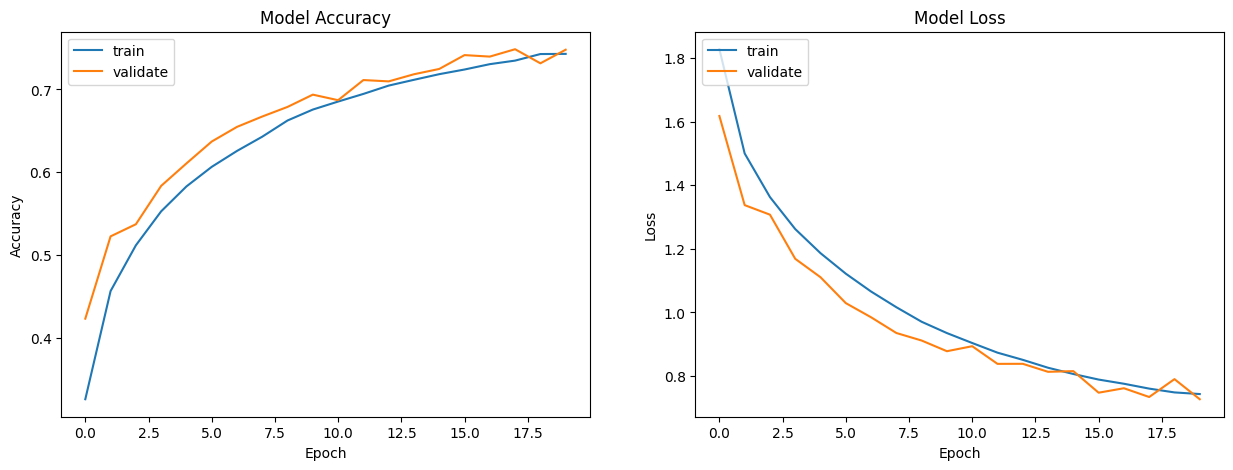

In [ ]:

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)
fig, axs = plt.subplots(1,2,figsize=(15,5))
# summarize history for accuracy
axs[0].plot(history.history['accuracy'])
axs[0].plot(history.history['val_accuracy'])
axs[0].set_title('Model Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(['train', 'validate'], loc='upper left')
# summarize history for loss
axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_title('Model Loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(['train', 'validate'], loc='upper left')
plt.show()


In [ ]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

pred = model.predict(x_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.7269 - accuracy: 0.7479
Test loss: 0.7269315123558044
Test accuracy: 0.7479000091552734
313/313 [==============================] - 2s 4ms/step


In [ ]:
def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.
    """
    if not ax:
        ax = plt.gca()

    im = ax.imshow(data, **kwargs)
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    ax.set_xlabel('Grupo verdadero')
    ax.set_ylabel('Grupo acertado')

    return im, cbar

def annotate_heatmap(im, data=None, fmt="d", threshold=None):
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, format(data[i, j], fmt), horizontalalignment="center",
                                 color="white" if data[i, j] > thresh else "black")
            texts.append(text)

    return texts

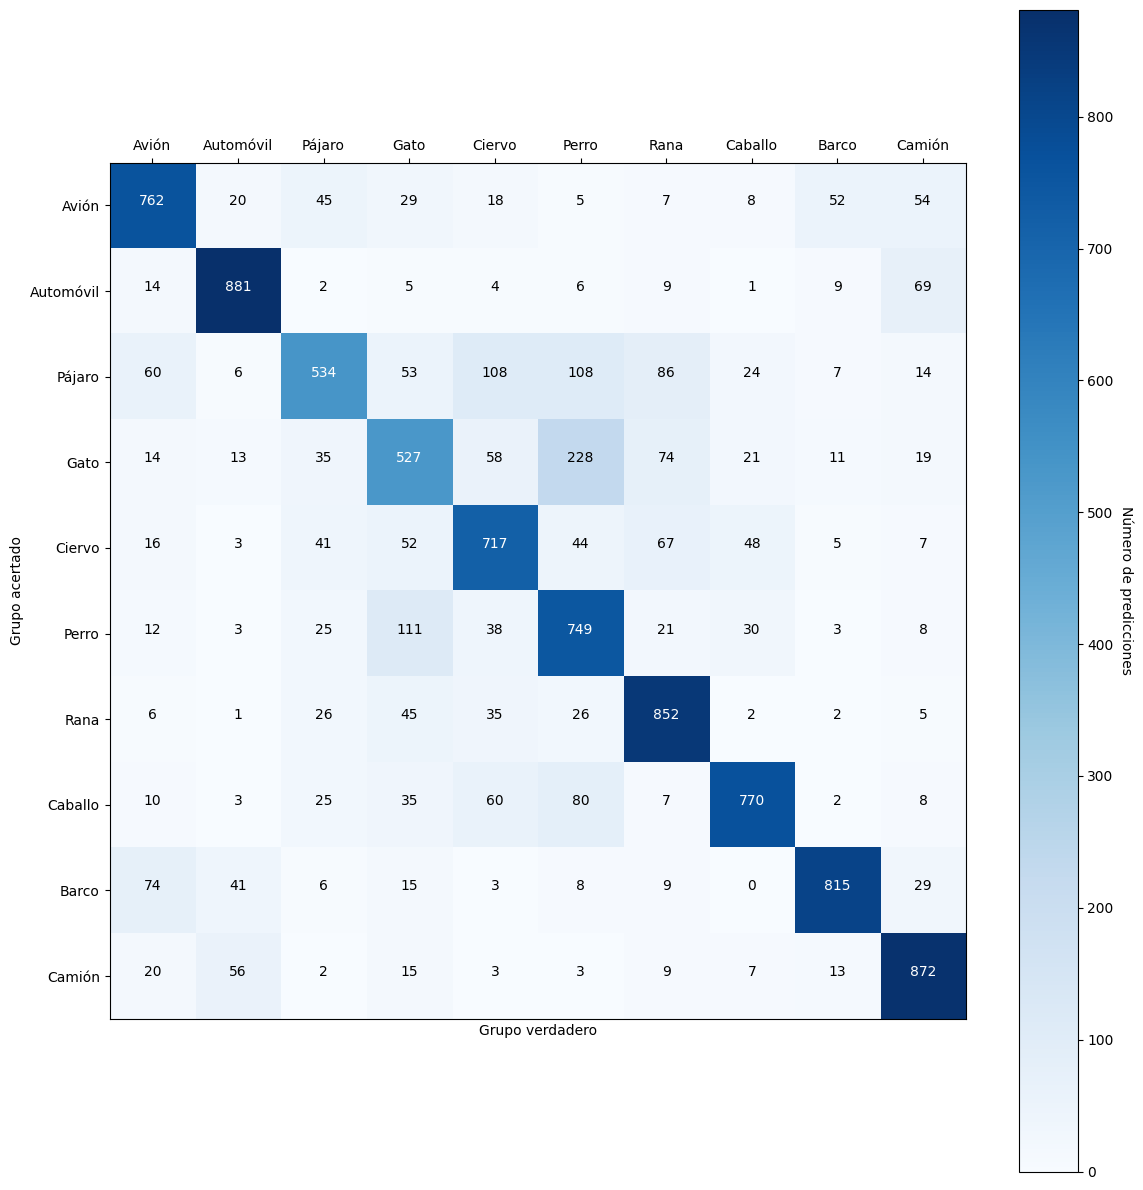

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
labels = ['Avión', 'Automóvil', 'Pájaro', 'Gato', 'Ciervo', 'Perro', 'Rana', 'Caballo', 'Barco', 'Camión']

Y_pred_classes = np.argmax(pred, axis=1)
Y_true = np.argmax(y_test, axis=1)
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = pred[errors]
Y_true_errors = Y_true[errors]
X_test_errors = x_test[errors]

cm = confusion_matrix(Y_true, Y_pred_classes)
thresh = cm.max() / 2.

fig, ax = plt.subplots(figsize=(12,12))
im, cbar = heatmap(cm, labels, labels, ax=ax,
                   cmap=plt.cm.Blues, cbarlabel="Número de predicciones")

texts = annotate_heatmap(im, data=cm, threshold=thresh)

fig.tight_layout()
plt.show()